## Double click to edit and enter your team data

Student 1 Name: Lobna Hesham Desoki

Student 1 ID: 52-0279
___
Student 2 Name: Menna Mohamed Abdelaziz 

Student 2 ID: 52-0421
___
Student 3 Name: Mariam Abduljawad

Student 3 ID: 52-2935
___
Student 4 Name:

Student 4 ID:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Imports**
Don't remove any import. However, you may add to them if you wish to

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import cv2
from sklearn.datasets import make_blobs
from google.colab.patches import cv2_imshow

##**Image Functions**##
**Read an image**

Replace (image.jpg) with the image name you are going to use after you upload the image to your *colab* notebook.

In [8]:
image = Image.open('/content/Milestone3_image.jpg')

**To display your image**

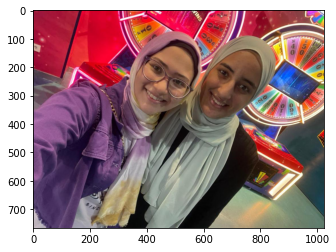

In [9]:
plt.imshow(image)

##Given Helper Functions##

In [10]:
def get_size(image):
  return image.size

In [11]:
def get_pixel_value(img,col,row):
  return img.getpixel((col,row))

In [12]:
def quantization(image, n):
  return image.quantize(n)

In [13]:
def get_unique_values(image):
  return np.unique(image), len(np.unique(image))

In [14]:
def extract_row_color(arr,row,color):
  filtered = filter(lambda item: ((item[0] == row) and (item[-1] == color)), arr)
  return list(filtered)


In [15]:
def merge_row_color(filtered, row, color):
  remove_row_color = [item[1:-1] for item in filtered]
  merge_runs = (row,)
  for item in remove_row_color:
    merge_runs = merge_runs + item
  otp = merge_runs + (color,)
  return otp

##Task 1##
**Task 1: Return the unique colors before and after quantization**

In [16]:
def show_image_information(image):
  original_colors = []
  quantized_colors=[]
  # ......start code......
  original_colors = get_unique_values(image)
  quantized_colors = get_unique_values(quantization(image, 9))
  # ......end code......
  return original_colors,quantized_colors

In [17]:
show_image_information(image)

((array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
         143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
         156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
         169, 170, 171, 172, 173, 174,

Test your code
 

##Task 2##
**Task 2: Compute the runs per each row for the image**

In [18]:
def compute_runs(image, unique_values):

  runs_code = []
  # ......start code......
  size = get_size(image)
  rows=size[1]
  columns=size[0] 
  X = []
  for i in range (rows-1) :
    count=0
    for j in range (columns-1):
      if (j==columns-2):
        if(get_pixel_value(image,j,i)==get_pixel_value(image,j+1,i)):
          X.append((i,j-count,j+1,get_pixel_value(image,j,i))) 
        else:
          X.append((i,j-count,j,get_pixel_value(image,j,i)))
          X.append((i,j+1,j+1,get_pixel_value(image,j+1,i)))
      else:
        if(get_pixel_value(image,j,i)==get_pixel_value(image,j+1,i)):
          count+=1
        else:
          X.append((i,j-count,j,get_pixel_value(image,j,i)))
          count=0
  runs_code=X 
  # ......end code......
  return runs_code

To test you code

In [19]:

image_quantized = quantization(image, 9)
unique_values,length_unique_values = get_unique_values(image_quantized)
image_runs = compute_runs(image_quantized, unique_values)
image_runs

[(0, 0, 9, 5),
 (0, 10, 13, 3),
 (0, 14, 160, 5),
 (0, 161, 162, 6),
 (0, 163, 163, 7),
 (0, 164, 170, 8),
 (0, 171, 171, 6),
 (0, 172, 298, 5),
 (0, 299, 299, 3),
 (0, 300, 302, 0),
 (0, 303, 303, 3),
 (0, 304, 308, 5),
 (0, 309, 309, 6),
 (0, 310, 312, 5),
 (0, 313, 317, 0),
 (0, 318, 318, 3),
 (0, 319, 323, 5),
 (0, 324, 328, 3),
 (0, 329, 329, 5),
 (0, 330, 330, 6),
 (0, 331, 332, 5),
 (0, 333, 335, 3),
 (0, 336, 337, 5),
 (0, 338, 339, 6),
 (0, 340, 340, 2),
 (0, 341, 343, 0),
 (0, 344, 380, 3),
 (0, 381, 381, 4),
 (0, 382, 383, 6),
 (0, 384, 397, 3),
 (0, 398, 402, 6),
 (0, 403, 420, 5),
 (0, 421, 422, 3),
 (0, 423, 437, 0),
 (0, 438, 440, 3),
 (0, 441, 521, 5),
 (0, 522, 523, 3),
 (0, 524, 531, 5),
 (0, 532, 535, 6),
 (0, 536, 538, 3),
 (0, 539, 539, 0),
 (0, 540, 541, 3),
 (0, 542, 543, 5),
 (0, 544, 545, 3),
 (0, 546, 547, 6),
 (0, 548, 550, 5),
 (0, 551, 552, 3),
 (0, 553, 554, 5),
 (0, 555, 556, 3),
 (0, 557, 557, 6),
 (0, 558, 558, 3),
 (0, 559, 570, 0),
 (0, 571, 571, 3),


##Task 3##
**Compute the Run-Length Encoding of an Image**

In [60]:
from numpy.ma.extras import unique
def compute_RLE(image, unique_values):
    result = []
     #......start code......
    size = get_size(image)
    rows = size[1]
    arr = compute_runs(image,unique_values)
    for n in range (rows-1):
      for color in range (len(unique_values)):
        X = extract_row_color(arr,n,unique_values[color])
        mer = merge_row_color(X,n,unique_values[color])
        result.append(mer);
     #......end code......
    return result

Test your code

In [61]:
runLength=compute_RLE(image_quantized,unique_values)
runLength
  

[(0,
  300,
  302,
  313,
  317,
  341,
  343,
  423,
  437,
  539,
  539,
  559,
  570,
  626,
  645,
  691,
  691,
  705,
  705,
  707,
  708,
  711,
  712,
  716,
  722,
  742,
  748,
  959,
  962,
  975,
  998,
  1004,
  1011,
  1013,
  1023,
  0),
 (0, 741, 741, 999, 999, 1001, 1003, 1012, 1012, 1),
 (0, 340, 340, 958, 958, 1000, 1000, 2),
 (0,
  10,
  13,
  299,
  299,
  303,
  303,
  318,
  318,
  324,
  328,
  333,
  335,
  344,
  380,
  384,
  397,
  421,
  422,
  438,
  440,
  522,
  523,
  536,
  538,
  540,
  541,
  544,
  545,
  551,
  552,
  555,
  556,
  558,
  558,
  571,
  571,
  601,
  601,
  624,
  625,
  646,
  646,
  675,
  686,
  688,
  690,
  692,
  696,
  703,
  704,
  706,
  706,
  709,
  710,
  715,
  715,
  723,
  723,
  740,
  740,
  749,
  749,
  827,
  845,
  872,
  875,
  880,
  883,
  886,
  887,
  963,
  974,
  3),
 (0, 381, 381, 957, 957, 4),
 (0,
  0,
  9,
  14,
  160,
  172,
  298,
  304,
  308,
  310,
  312,
  319,
  323,
  329,
  329,
  331,
  332,